# SQL project

## Step 4. Exploratory data analysis (Python)


You have files that contain the data retrieved with queries from the previous tasks.

/datasets/project_sql_result_01.csv — the result of the first query. 

It contains the following data:

company_name: taxi company name

trips_amount: the number of rides for each taxi company on November 15-16, 2017.

/datasets/project_sql_result_04.csv — the result of the second query. 

It contains the following data:

dropoff_location_name: Chicago neighborhoods where rides ended

average_trips: the average number of rides that ended in each neighborhood in November 2017.


## For these two datasets you now need to

## import the files
## study the data they contain
## make sure the data types are correct
## identify the top 10 neighborhoods in terms of drop-offs
## make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
## draw conclusions based on each graph and explain the results


### 1) import the files

In [ ]:
import pandas as pd
from scipy import stats as st

In [ ]:
company_trip_number = pd.read_csv('/datasets/project_sql_result_01.csv')

In [ ]:
dropoff_trip_avg = pd.read_csv('/datasets/project_sql_result_04.csv')

### 2) study the data they contain

In [ ]:
company_trip_number.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [ ]:
len(company_trip_number['company_name'].unique())

64

In [ ]:
dropoff_trip_avg.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [ ]:
len(dropoff_trip_avg['dropoff_location_name'].unique())

94

In [ ]:
company_trip_number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
dropoff_trip_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### 3) make sure the data types are correct

As seen in the company_trip_number.info() and dropoff_trip_avg.info() above, the data types are correct.

### 4) identify the top 10 neighborhoods in terms of drop-offs

In [ ]:
top_10_dropoff_neighborhoods = dropoff_trip_avg.sort_values(by='average_trips', ascending=False).head(10)

In [ ]:
top_10_dropoff_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


These are the top 10 neighborhoods: Loop, River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, and Sheffied & DePaul.

### 5) make graphs: 

#### taxi companies and number of rides

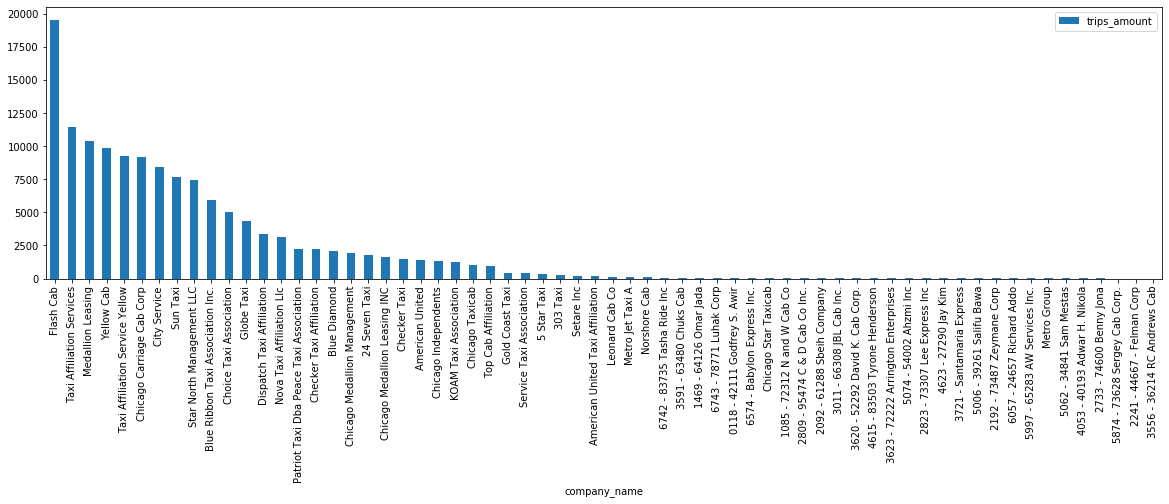

In [ ]:
company_trip_number.sort_values(by='trips_amount', ascending=False).plot(kind='bar', x='company_name', y='trips_amount', figsize=(20,5))

####  top 10 neighborhoods by number of dropoffs

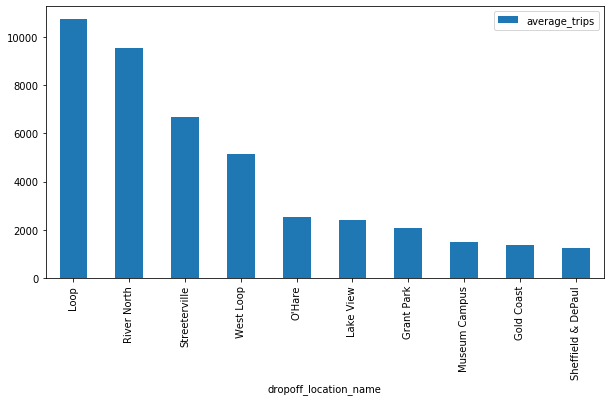

In [ ]:
top_10_dropoff_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', figsize=(10,5))

### 6) draw conclusions based on each graph and explain the results

1) Flash Cab is the most popular company by far. It seems as if there are 10 popular cab companies and then the rest are very small, with a lot less trips. This could be because the popular ones are cab chains while the smaller ones could be independently owned.

2) Most dropoffs occur in the Loop, River North, and Streeterville .These neighborhoods are downtonwn and are the most popular neighborhoods. All of the top 10 are near the downtown area and a lot of people work here and also live here. O'Hare also has a pretty significant number even though it is far from downtown because that is where the airport is and a lot of people use cabs to get to the airport.

## Step 5. Testing hypotheses (Python)


/datasets/project_sql_result_07.csv — the result of the last query. 

It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:

start_ts: pickup date and time

weather_conditions: weather conditions at the moment the ride started

duration_seconds: ride duration in seconds


In [ ]:
rides_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [ ]:
rides_weather.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [ ]:
rides_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [ ]:
rides_weather['start_datetime']= pd.to_datetime(rides_weather['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
rides_weather['day_of_week']= rides_weather['start_datetime'].dt.weekday
# week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.

In [ ]:
rides_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 5 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
start_datetime        1068 non-null datetime64[ns]
day_of_week           1068 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 41.8+ KB


In [ ]:
rides_weather.head()

,start_ts,weather_conditions,duration_seconds,start_datetime,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,2017-11-25 16:00:00,5
1,2017-11-25 14:00:00,Good,1920.0,2017-11-25 14:00:00,5
2,2017-11-25 12:00:00,Good,1543.0,2017-11-25 12:00:00,5
3,2017-11-04 10:00:00,Good,2512.0,2017-11-04 10:00:00,5
4,2017-11-11 07:00:00,Good,1440.0,2017-11-11 07:00:00,5


### Test the hypothesis: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [ ]:
#fix this section

In [ ]:
rainy_saturday_data = rides_weather[(rides_weather['weather_conditions']== 'Bad') & (rides_weather['day_of_week']== 5)]

In [ ]:
other_data = rides_weather[(rides_weather['weather_conditions'] != 'Bad') | (rides_weather['day_of_week'] != 5)]

In [ ]:
rainy_saturday = rainy_saturday_data['duration_seconds']

In [ ]:
other = other_data['duration_seconds']

#### Decide where to set the significance level (alpha) on your own.


In [ ]:
alpha = 0.05 

I set alpha = 0.05 because this is the conventional threshold value for the p-value. This is the significance level that I chose to test the hypotheses. I would not want to be wrong more than 5% of the time.

In [ ]:
results = st.ttest_ind(
        rainy_saturday, 
        other)

In [ ]:
print('p-value:', results.pvalue)

p-value: 6.517970327099473e-12


In [ ]:
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

We reject the null hypothesis


#### Explain how you formed the null and alternative hypotheses.


Null hypothesis: The average duration of rides from the Loop to O'Hare International Airport is the same on rainy Saturdays.

Alternative hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

#### Explain what criterion you used to test the hypotheses and why.


Since the null hypothesis was rejected, we do not reject the alternative hypothesis and we can say that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Conclusion

The fact that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays makes sense. It takes longer to get to O'Hare when weather conditions are bad because traffic is worse and the highways are slower. In addition, it is the weekend so more people are out and there is even worse traffic.